In [52]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import itertools
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
def get_approaches_results(datasets, column_mean, column_std, group_by_th = False, items_num = 1000):
    mean = []
    std = []
    #initial
    if group_by_th == True:
        ths = datasets[0]["threshold"]
        for th in ths:
            for data in datasets:
                data = data[data["threshold"]==th]
                if(column_mean == 'cost'):
                    vals = data[column_mean]/data['cost_ratio'][0]/items_num
                    for v in vals:
                        mean.append(v)
                    vals_std = data[column_std]/data['cost_ratio'][0]/items_num
                    for s in vals_std:
                        std.append(s)
                else:
                    vals = data[column_mean]
                    for v in vals:
                        mean.append(v)
                    vals_std = data[column_std]
                    for s in vals_std:
                        std.append(s)
    else:
        for data in datasets:
            if(column_mean == 'cost'):
                vals = data[column_mean]/data['cost_ratio']/items_num
                for v in vals:
                    mean.append(v)
                vals_std = data[column_std]/data['cost_ratio']/items_num
                for s in vals_std:
                    std.append(s)
            else:
                vals = data[column_mean]
                for v in vals:
                    mean.append(v)
                vals_std = data[column_std]
                for s in vals_std:
                    std.append(s)
        
    return mean, std

def get_group_colors(groups, subgroups):
    #colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']
    return np.concatenate([[np.concatenate(np.random.rand(3,1))] * subgroups for x in range(groups)])

def concatenate(list1, list2):
    result = []
    for elem1 in list1:
        result.append(elem1)
        
    for elem2 in list2:
        result.append(elem2)
        
    return result

def get_total_results(list1, list2, column, mv_num=None, cost_ratio=None, decision_fn=None, threshold=None, class_fn=None, c=None, e=None):
    if mv_num != None:
        return concatenate(list1[list1['votes']==mv_num][column].values, 
                           list2[list2['votes']==mv_num][column].values)
    elif c != None:
        return concatenate(list1[list1['c']==c][list1['e']==e][column].values, 
                           list2[list2['c']==c][list2['e']==e][column].values)
    elif class_fn != None:
        return concatenate(list1[list1['class_fn']==class_fn][list1['decision_fn']==decision_fn][list1['cost_ratio']==cost_ratio][list1['threshold']==threshold][column].values, 
                           list2[list2['class_fn']==class_fn][list2['decision_fn']==decision_fn][list2['cost_ratio']==cost_ratio][list2['threshold']==threshold][column].values)
    elif decision_fn != None:
        return concatenate(list1[list1['decision_fn']==decision_fn][list1['cost_ratio']==cost_ratio][list1['threshold']==threshold][column].values, 
                           list2[list2['decision_fn']==decision_fn][list2['cost_ratio']==cost_ratio][list2['threshold']==threshold][column].values)
    else:
        return concatenate(list1[column].values, 
                           list2[column].values)

In [173]:
from itertools import cycle

def plot_elems_lines(elems, x_values, columns, ylabel, legends, url_to_save_fig):
    lines = ["-", "--", "-.", ":"]
    xticks_ind = np.arange(len(x_values))
    plt.figure(num=1, figsize=(20, 20), facecolor='w', edgecolor='k')
    plt.grid(zorder=0)

    for key, column in enumerate(columns):
        linecycler = cycle(lines)
        plt.subplot(3, 2, key + 1)
        column_std = f'{column}_std'

        for elem in elems:
            plt.errorbar(xticks_ind, column, column_std, data=elem, linestyle=next(linecycler), marker='o',
                         markersize=5)
        # end for

        plt.xticks(xticks_ind, x_values, fontsize=10)
        plt.yticks(fontsize=10)
        plt.xlabel(ylabel, fontsize=12)
        plt.ylabel(column.capitalize(), fontsize=12)
        plt.grid()
        plt.title(column.capitalize(), fontweight="bold", fontsize=20)
        plt.legend(legends)

    plt.tight_layout()
    plt.savefig(url_to_save_fig, bbox_inches = 'tight', pad_inches = 0)
    plt.show()

## MV Fixed votes

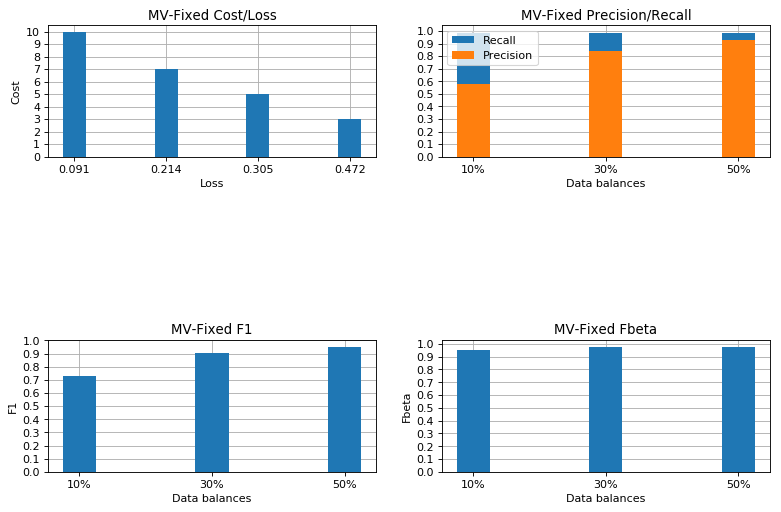

In [33]:
data = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv_full_metrics.csv')



plt.figure(num=1, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.tight_layout()
width = 0.05       # the width of the bars: can also be len(x) sequence


plt.subplot(431)
ind = [.2, .4, .6, .8]
#balanced dataset, diff #votes
smv_05 = data[data['class_fn']=='majority_voting'][data['data_bal']==0.5][data['cost_ratio']==0.05].iloc[::-1]
cost_mean = smv_05["cost"]/smv_05["cost_ratio"]/1000
cost_std = smv_05["cost_std"]/smv_05["cost_ratio"]/1000

p1 = plt.bar(ind, cost_mean, width, yerr=cost_std, zorder=3)
loss_mean = smv_05["loss"]
loss_std = smv_05["loss_std"]
plt.title('MV-Fixed Cost/Loss')
plt.ylabel("Cost")
plt.xlabel("Loss")
plt.xticks(ind, [round(x, 3) for x in smv_05['loss']])
plt.yticks(np.arange(0,11,1))
plt.grid(zorder=0)


#data balance
smv_05 = data[data['class_fn']=='majority_voting'][data['votes']==10][data['cost_ratio']==0.05]
plt.subplot(432)
ind = [.5, .3, .1]
precision_mean = smv_05["precision"]
precision_std = smv_05["precision_std"]
recall_mean = smv_05["recall"]
recall_std = smv_05["recall_std"]
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3)
p2 = plt.bar(ind, precision_mean, width, yerr=precision_std, zorder=3)
plt.title('MV-Fixed Precision/Recall')
#plt.ylabel("Cost")
plt.xlabel("Data balances")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'))
plt.xticks(ind, ['50%', '30%', '10%'])
plt.yticks(np.arange(0,1.1,.1))
plt.grid(zorder=0)


#f1
#data balance
smv_05 = data[data['class_fn']=='majority_voting'][data['votes']==10][data['cost_ratio']==0.05]
plt.subplot(437)
ind = [.5, .3, .1]
f1_mean = smv_05["f1"]
f1_std = smv_05["f1_std"]
p1 = plt.bar(ind, f1_mean, width, yerr=f1_std, zorder=3)
plt.title('MV-Fixed F1')
plt.ylabel("F1")
plt.xlabel("Data balances")
plt.xticks(ind, ['50%', '30%', '10%'])
plt.yticks(np.arange(0,1.1,.1))
plt.grid(zorder=0)

#f1
#data balance
smv_05 = data[data['class_fn']=='majority_voting'][data['votes']==10][data['cost_ratio']==0.05]
plt.subplot(438)
ind = [.5, .3, .1]
fbeta_mean = smv_05["fbeta"]
fbeta_std = smv_05["fbeta_std"]
p1 = plt.bar(ind, fbeta_mean, width, yerr=fbeta_std, zorder=3)
plt.title('MV-Fixed Fbeta')
plt.ylabel("Fbeta")
plt.xlabel("Data balances")
plt.xticks(ind, ['50%', '30%', '10%'])
plt.yticks(np.arange(0,1.1,.1))
plt.grid(zorder=0)

plt.show()

## Comparison fixed-adaptive

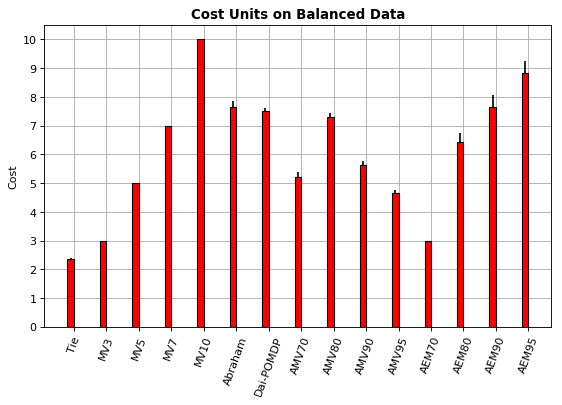

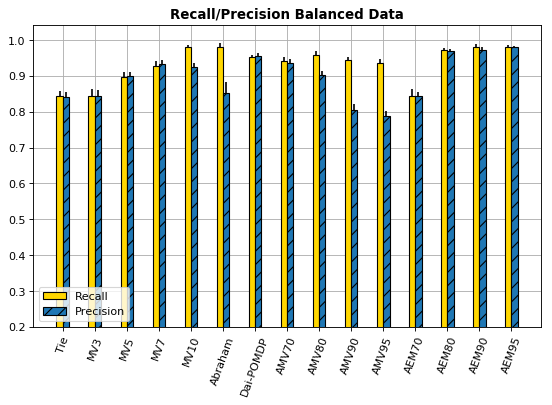

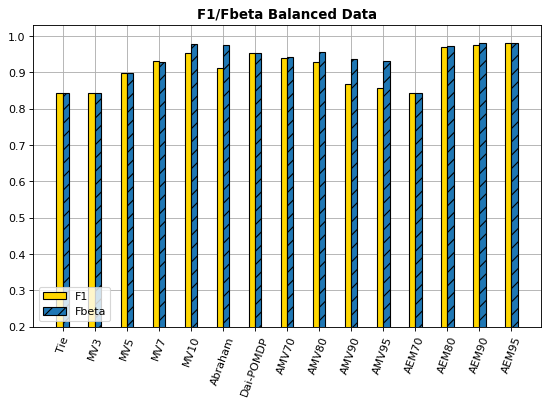

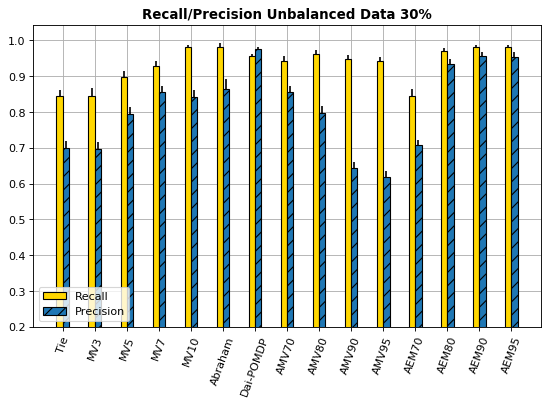

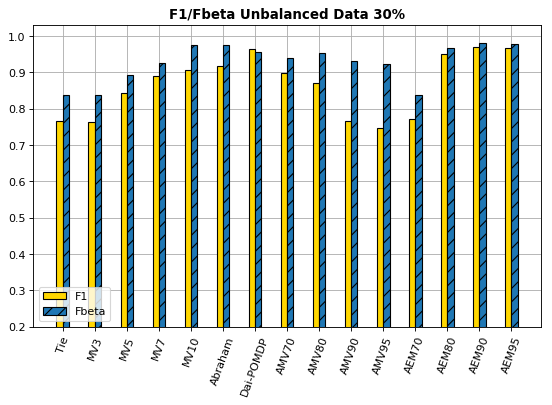

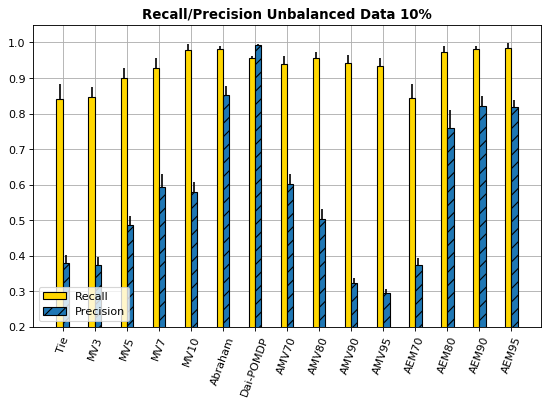

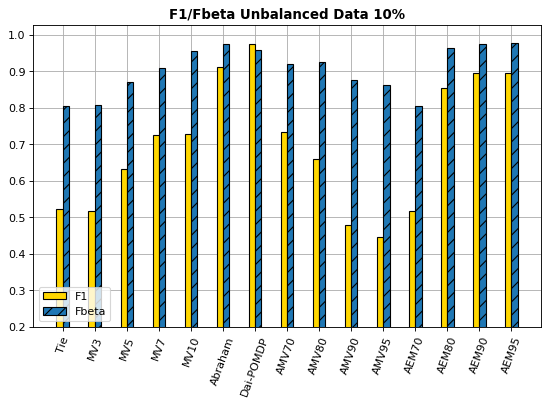

In [38]:
from IPython.core import display as ICD

data_mv = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv_full_metrics.csv')
data_tie = pd.read_csv('./results/simulated_dataset/all_combinations_results_break_tie_full_metrics.csv')
data_abraham = pd.read_csv('./results/abraham/results_cs_es_varied_full_metrics.csv')
data_agenthunt = pd.read_csv('./results/agenthunt/simulated_datasets_results_full_metrics.csv')
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive_full_metrics.csv')

abraham_c = 2
abraham_e = 0.2


cr = 0.05

data_bal = 0.5
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

items = 15
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = ('Tie', 'MV3', 'MV5', 'MV7', 'MV10', 'Abraham', 'Dai-POMDP', 'AMV70', 'AMV80', 'AMV90', 'AMV95', 'AEM70', 'AEM80', 'AEM90', 'AEM95')


#Figure 1
plt.figure(num=1, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)

#Balanced dataset
#1)
plt.subplot(221)
cost_mean, cost_std = get_approaches_results(datasets_print, "cost", "cost_std")

p1 = plt.bar(ind, cost_mean, width, yerr=cost_std, zorder=3, color='red', edgecolor='black')
plt.ylabel('Cost')
plt.title('Cost Units on Balanced Data', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,11,1))
plt.savefig("./charts/balanced_data_cost", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#2)
plt.figure(num=2, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std")
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std")
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, yerr=precision_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title('Recall/Precision Balanced Data', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/balanced_data_quality", bbox_inches = 'tight', pad_inches = 0)
#plt.show()

#2.1) F1 - FBETA
plt.figure(num=22, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(222)
f1_mean, f1_std = get_approaches_results(datasets_print, "f1", "f1_std")
fbeta_mean, fbeta_std = get_approaches_results(datasets_print, "fbeta", "fbeta_std")
p1 = plt.bar(ind, f1_mean, width, yerr=f1_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, fbeta_mean, width, yerr=fbeta_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('F1', 'Fbeta'), loc=3)
plt.title('F1/Fbeta Balanced Data', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
#plt.savefig("./charts/balanced_data_quality_f1_fbeta", bbox_inches = 'tight', pad_inches = 0)
plt.show()


#unbalanced plots
#Unbalanced datasets 30%
#3)
plt.figure(num=3, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)

data_bal = 0.3
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

plt.subplot(221)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std")
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std")
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, yerr=precision_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title('Recall/Precision Unbalanced Data 30%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/unbalanced_data_30_quality", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#3.1) F1 - FBETA
plt.figure(num=32, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(222)
f1_mean, f1_std = get_approaches_results(datasets_print, "f1", "f1_std")
fbeta_mean, fbeta_std = get_approaches_results(datasets_print, "fbeta", "fbeta_std")
p1 = plt.bar(ind, f1_mean, width, yerr=f1_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, fbeta_mean, width, yerr=fbeta_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('F1', 'Fbeta'), loc=3)
plt.title('F1/Fbeta Unbalanced Data 30%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/unbalanced_data_30_quality_f1_fbeta", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#Unbalanced datasets 10%
#4)
plt.figure(num=4, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)

data_bal = 0.1
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

plt.subplot(221)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std")
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std")
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, yerr=precision_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title('Recall/Precision Unbalanced Data 10%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/unbalanced_data_10_quality", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#4.1) F1 - FBETA
plt.figure(num=42, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(222)
f1_mean, f1_std = get_approaches_results(datasets_print, "f1", "f1_std")
fbeta_mean, fbeta_std = get_approaches_results(datasets_print, "fbeta", "fbeta_std")
p1 = plt.bar(ind, f1_mean, width, yerr=f1_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, fbeta_mean, width, yerr=fbeta_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('F1', 'Fbeta'), loc=3)
plt.title('F1/Fbeta Unbalanced Data 10%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/unbalanced_data_10_quality_f1_fbeta", bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Cost impact .2 (1:5) vs .1 (1:10) vs .05 (1:20)

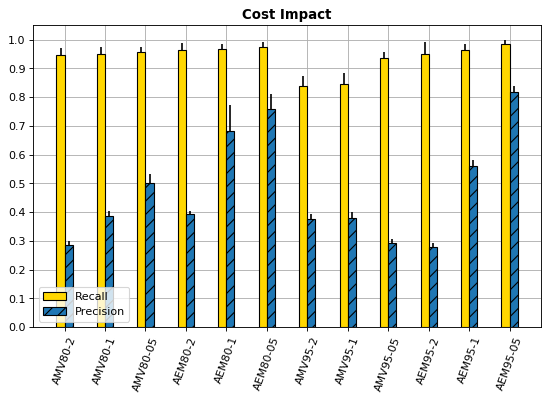

In [39]:
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive_full_metrics.csv')

data_bal = 0.1

ths = [0.8, 0.95]

adaptive_mv_5 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2][adaptive['threshold'].isin(ths)]
adaptive_bayes_5 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2][adaptive['threshold'].isin(ths)]

adaptive_mv_10 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1][adaptive['threshold'].isin(ths)]
adaptive_bayes_10 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1][adaptive['threshold'].isin(ths)]

adaptive_mv_20 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05][adaptive['threshold'].isin(ths)]
adaptive_bayes_20 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05][adaptive['threshold'].isin(ths)]

datasets_print = [adaptive_mv_5, adaptive_mv_10, adaptive_mv_20, adaptive_bayes_5, adaptive_bayes_10, adaptive_bayes_20]

items = 12
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = (
                #'AMV70-2', 'AMV70-1', 'AMV70-05', \
                #'AEM70-2', 'AEM70-1', 'AEM70-05', \
                'AMV80-2', 'AMV80-1', 'AMV80-05', \
                'AEM80-2', 'AEM80-1', 'AEM80-05', \
                #'AMV90-2', 'AMV90-1', 'AMV90-05', \
                #'AEM90-2','AEM90-1', 'AEM90-05', \
                'AMV95-2','AMV95-1', 'AMV95-05', \
                'AEM95-2','AEM95-1', 'AEM95-05')
                   

plt.figure(num=7, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
plt.grid(zorder=0)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std", True)
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std", True)
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, zorder=3, yerr=precision_std, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title("Cost Impact", fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.yticks(np.arange(0,1.1,.1))
plt.savefig("./charts/cost_impact", bbox_inches = 'tight', pad_inches = 0)



plt.show()

## Loss

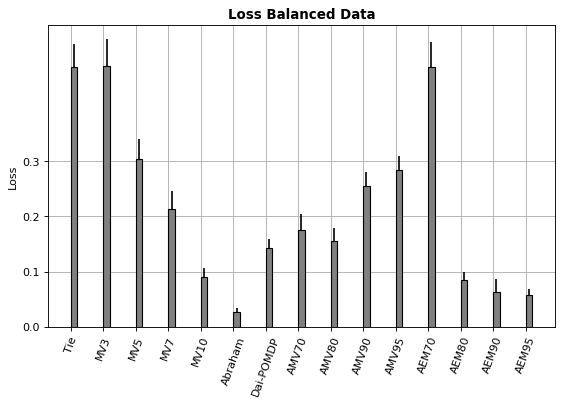

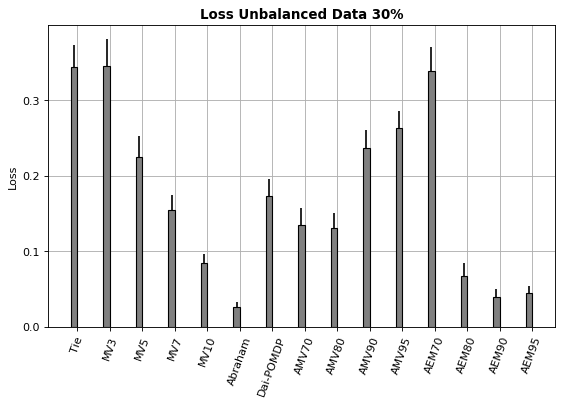

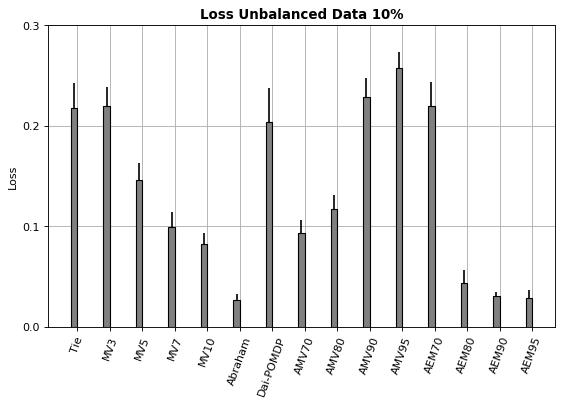

In [40]:
from IPython.core import display as ICD

data_mv = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv_full_metrics.csv')
data_tie = pd.read_csv('./results/simulated_dataset/all_combinations_results_break_tie_full_metrics.csv')
data_abraham = pd.read_csv('./results/abraham/results_cs_es_varied_full_metrics.csv')
data_agenthunt = pd.read_csv('./results/agenthunt/simulated_datasets_results_full_metrics.csv')
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive_full_metrics.csv')

abraham_c = 2
abraham_e = 0.2

items = 15
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = ('Tie', 'MV3', 'MV5', 'MV7', 'MV10', 'Abraham', 'Dai-POMDP', 'AMV70', 'AMV80', 'AMV90', 'AMV95', 'AEM70', 'AEM80', 'AEM90', 'AEM95')


#Figure 1
data_bal = 0.5
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

#plot
datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]


#2)
plt.figure(num=2, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
loss_mean, loss_std = get_approaches_results(datasets_print, "loss", "loss_std")
p2 = plt.bar(ind+width, loss_mean, width, yerr=loss_std, zorder=3, edgecolor='black', color='grey')
plt.title('Loss Balanced Data', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.ylabel('Loss')
plt.grid(zorder=0)
plt.yticks(np.arange(0, .4,.1))
plt.savefig("./charts/loss_balanced", bbox_inches = 'tight', pad_inches = 0)
plt.show()


#unbalanced plots
#Unbalanced datasets 30%
#3)
plt.figure(num=3, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
data_bal = 0.3
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

plt.subplot(221)
loss_mean, loss_std = get_approaches_results(datasets_print, "loss", "loss_std")
p1 = plt.bar(ind, loss_mean, width, yerr=loss_std, zorder=3, color='grey', edgecolor='black')
plt.ylabel('Loss')
plt.title('Loss Unbalanced Data 30%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0, .4,.1))
plt.savefig("./charts/loss_unbalanced_30", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#Unbalanced datasets 10%
#4)
plt.figure(num=4, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
data_bal = 0.1
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

plt.subplot(221)
loss_mean, loss_std = get_approaches_results(datasets_print, "loss", "loss_std")
p1 = plt.bar(ind, loss_mean, width, yerr=loss_std, zorder=3, color='grey', edgecolor='black')
plt.ylabel('Loss')
plt.title('Loss Unbalanced Data 10%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0, .4,.1))

plt.savefig("./charts/loss_unbalanced_10", bbox_inches = 'tight', pad_inches = 0)
plt.show()

## Adaptative MV over ths and crs

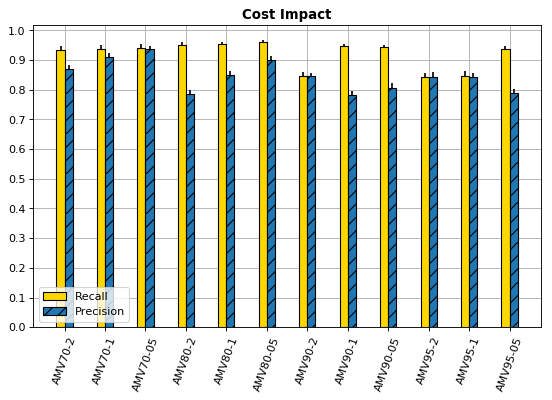

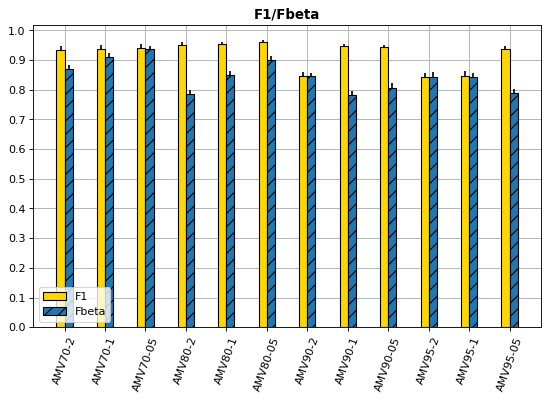

In [41]:
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive_full_metrics.csv')

data_bal = 0.5

#ths = [0.8, 0.95]

adaptive_mv_5 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2]#[adaptive['threshold'].isin(ths)]
adaptive_mv_10 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1]#[adaptive['threshold'].isin(ths)]
adaptive_mv_20 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]#[adaptive['threshold'].isin(ths)]

datasets_print = [adaptive_mv_5, adaptive_mv_10, adaptive_mv_20]

items = 12
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = ('AMV70-2', 'AMV70-1', 'AMV70-05', \
                'AMV80-2', 'AMV80-1', 'AMV80-05', \
                'AMV90-2', 'AMV90-1', 'AMV90-05', \
                'AMV95-2','AMV95-1', 'AMV95-05')
                   

plt.figure(num=7, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
plt.grid(zorder=0)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std", True)
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std", True)
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, zorder=3, yerr=precision_std, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title("Cost Impact", fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.yticks(np.arange(0,1.1,.1))
#plt.savefig("./charts/cost_impact", bbox_inches = 'tight', pad_inches = 0)

plt.figure(num=72, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(222)
plt.grid(zorder=0)
f1_mean, f1_std = get_approaches_results(datasets_print, "f1", "f1_std", True)
fbeta_mean, fbeta_std = get_approaches_results(datasets_print, "fbeta", "fbeta_std", True)
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, zorder=3, yerr=precision_std, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('F1', 'Fbeta'), loc=3)
plt.title("F1/Fbeta", fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.yticks(np.arange(0,1.1,.1))
#plt.savefig("./charts/cost_impact", bbox_inches = 'tight', pad_inches = 0)



plt.show()

In [207]:
from itertools import cycle

def plot_elems_lines(elems, x_values, columns, ylabel, legends, url_to_save_fig, titles, legend_loc = 'best'):
    lines = ["-", "--", "-.", ":"]
    xticks_ind = np.arange(len(x_values))
    plt.figure()
    #plt.grid(zorder=0)

    for key, column in enumerate(columns):
        linecycler = cycle(lines)
        #plt.subplot(3, 2, key + 1)
        column_std = f'{column}_std'

        for elem in elems:
            plt.errorbar(xticks_ind, column, column_std, data=elem, linestyle=next(linecycler), marker='o',
                         markersize=5)
        # end for

        plt.xticks(xticks_ind, x_values, fontsize=10)
        plt.yticks(fontsize=10)
        plt.xlabel(ylabel, fontsize=12)
        plt.ylabel(column.capitalize(), fontsize=12)
       
        plt.title(titles[key], fontweight="bold", fontsize=15)
        plt.legend(legends, loc=legend_loc)

    #plt.tight_layout()
    plt.grid()
    plt.savefig(url_to_save_fig, bbox_inches = 'tight', pad_inches = 0)
    plt.show()

In [217]:
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive_full_metrics.csv')

data_bal = 0.5

thresholds = adaptive.threshold.unique()
xticks_names = ('AMV (cr=1/20)', 'AMV (cr=1/10)','AMV (cr=1/5)','AEM (cr=1/20)', 'AEM (cr=1/10)','AEM (cr=1/5)' )
items = len(xticks_names)

adaptive_mv_05 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

adaptive_mv_1 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1]

adaptive_mv_2 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2]

adaptive_em_05 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

adaptive_em_1 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1]

adaptive_em_2 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2]

aux_elems = [adaptive_mv_05, adaptive_mv_1, adaptive_mv_2, adaptive_em_05, adaptive_em_1, adaptive_em_2]

elems = []
cost_column = 'cost'
cost_std_column = 'cost_std'
for elem in aux_elems:
    #elem[cost_column] = elem[cost_column].apply(lambda x: x/0.05/1000)
    #elem[cost_std_column] = elem[cost_std_column].apply(lambda x: x/0.05/1000)
    
    elem[cost_column] = elem.apply(lambda row: row.cost/row.cost_ratio/1000, axis = 1)
    elem[cost_std_column] = elem.apply(lambda row: row.cost_std/row.cost_ratio/1000, axis = 1) 
    elems.append(elem)

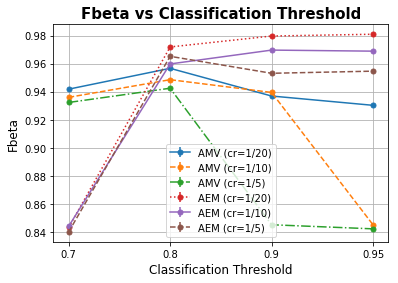

In [208]:
columns_to_print = ['fbeta']
url_to_save_plt = "./charts/fbeta_adaptive_comparisson"

titles = ['Fbeta vs Classification Threshold']

plot_elems_lines(elems, thresholds, columns_to_print, "Classification Threshold", xticks_names, url_to_save_plt, titles)

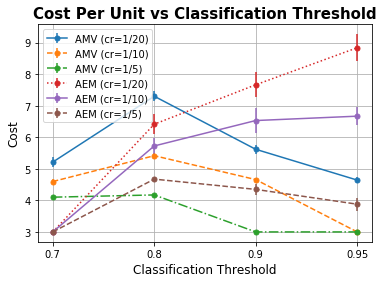

In [219]:
columns_to_print = ['cost']
url_to_save_plt = "./charts/cost_adaptive_comparisson"
titles = ['Cost Per Unit vs Classification Threshold']
loc = 'upper left'
plot_elems_lines(elems, thresholds, columns_to_print, "Classification Threshold", xticks_names, url_to_save_plt, titles, loc)

## Real world datasets

- Database: BarzanMozafari - Items: 1000 - Workers: 83 - Workers Accuracy Avg: 68.91
- Database: RTE - Items: 800 - Workers: 164 - Workers Accuracy Avg: 83.7
- Database: SpamCF - Items: 101 - Workers: 150 - Workers Accuracy Avg: 69.07
- Database: TEMP - Items: 462 - Workers: 76 - Workers Accuracy Avg: 84.13
- Database: WVSCM - Items: 160 - Workers: 17 - Workers Accuracy Avg: 65.77

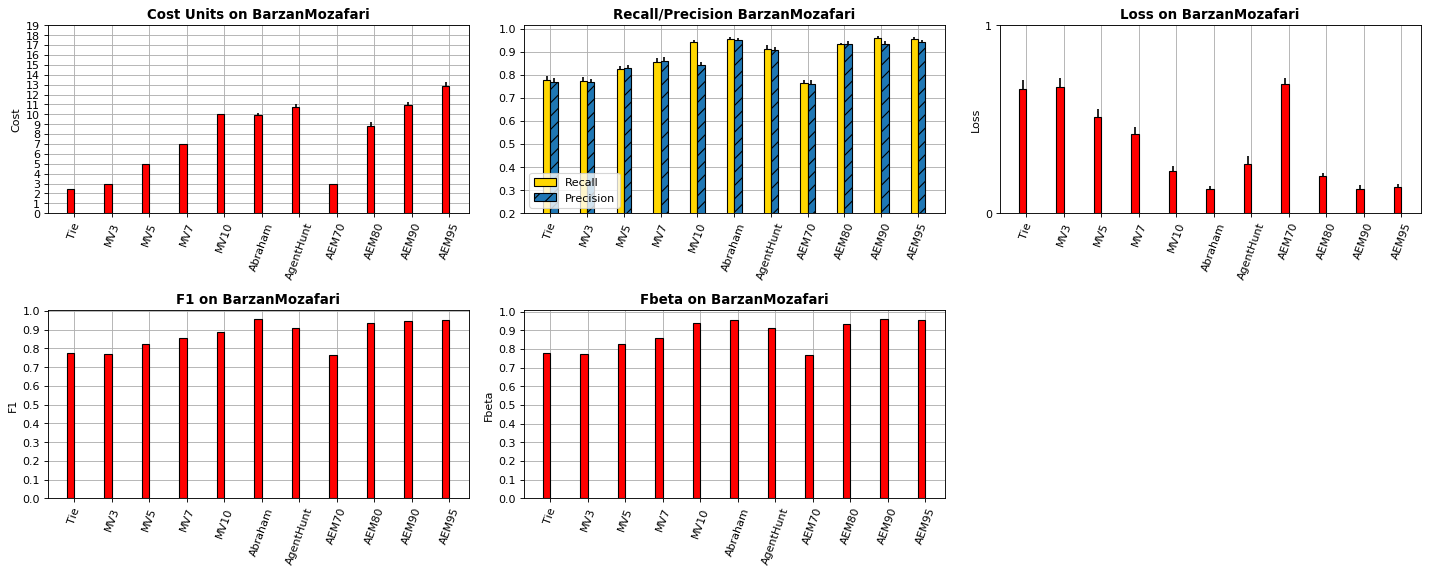



--------------------------------------------------




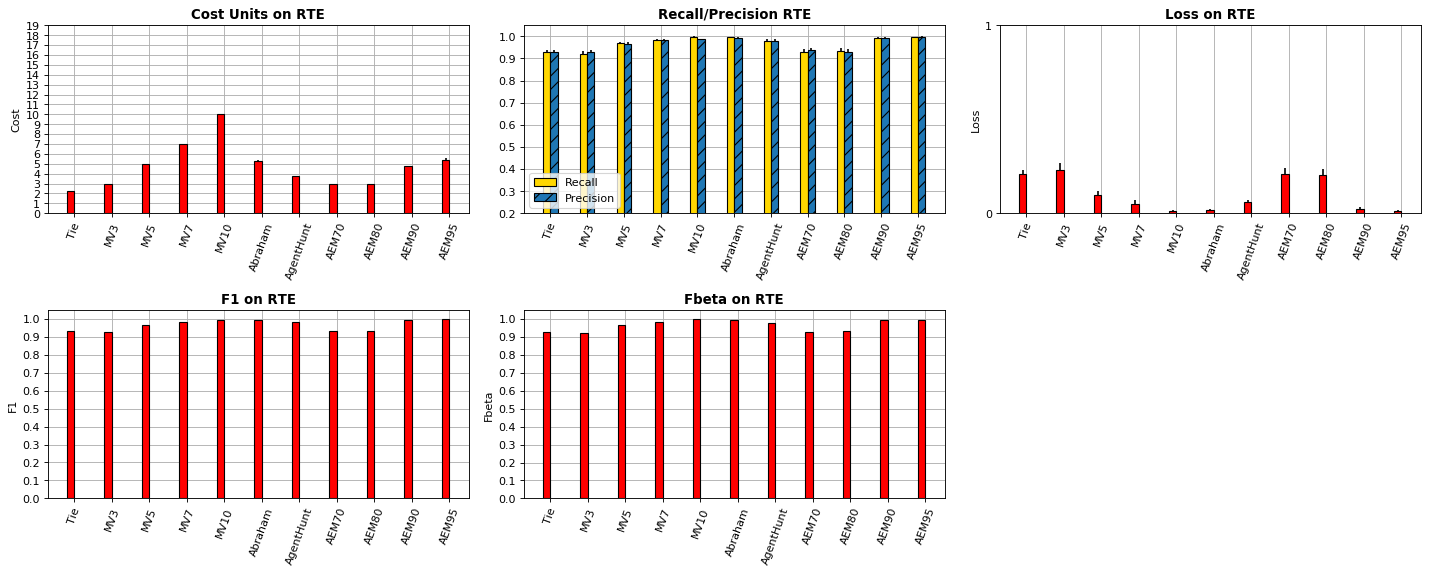



--------------------------------------------------




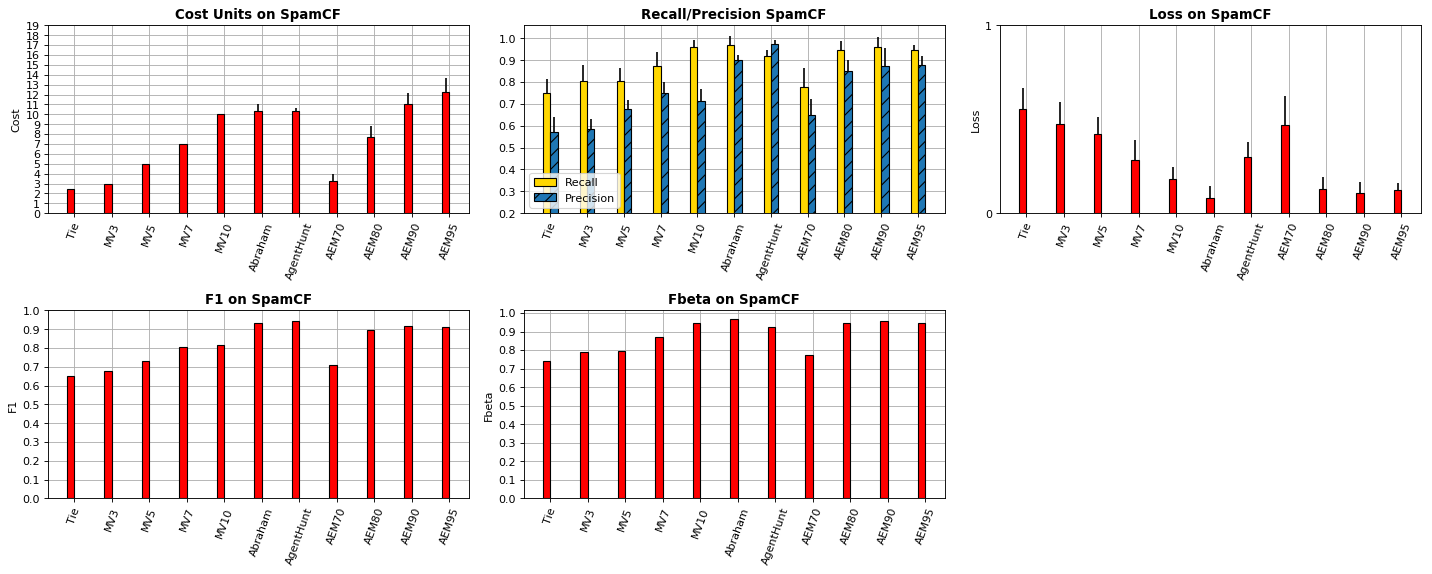



--------------------------------------------------




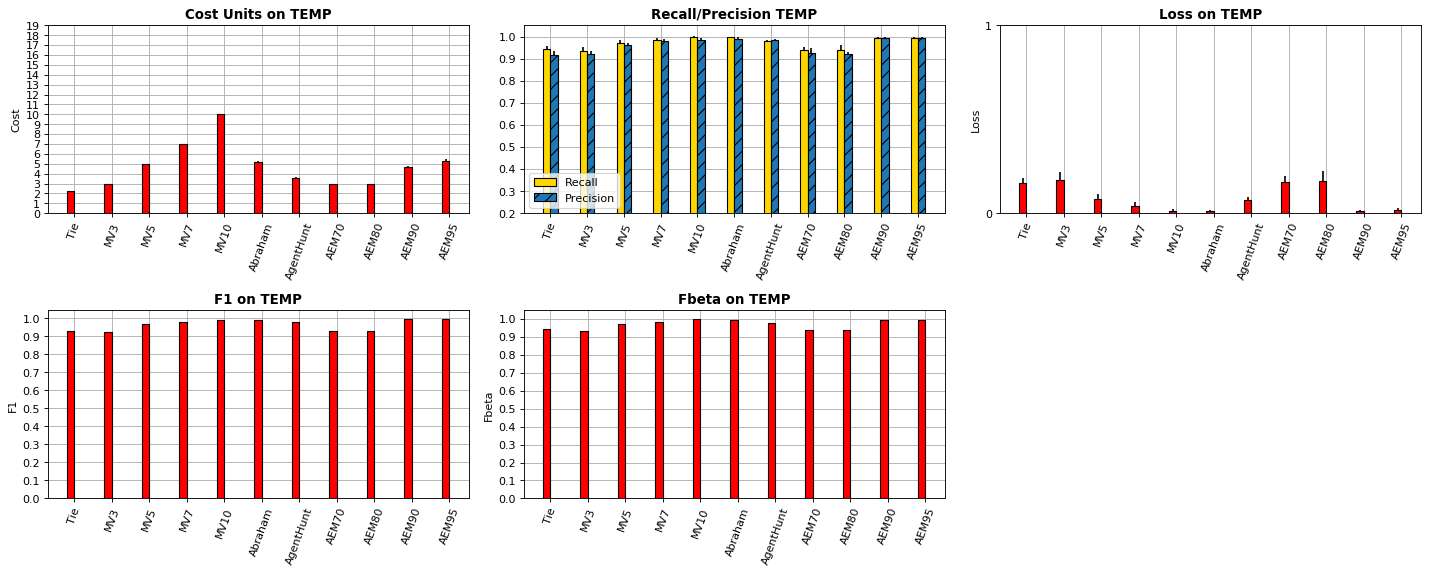



--------------------------------------------------




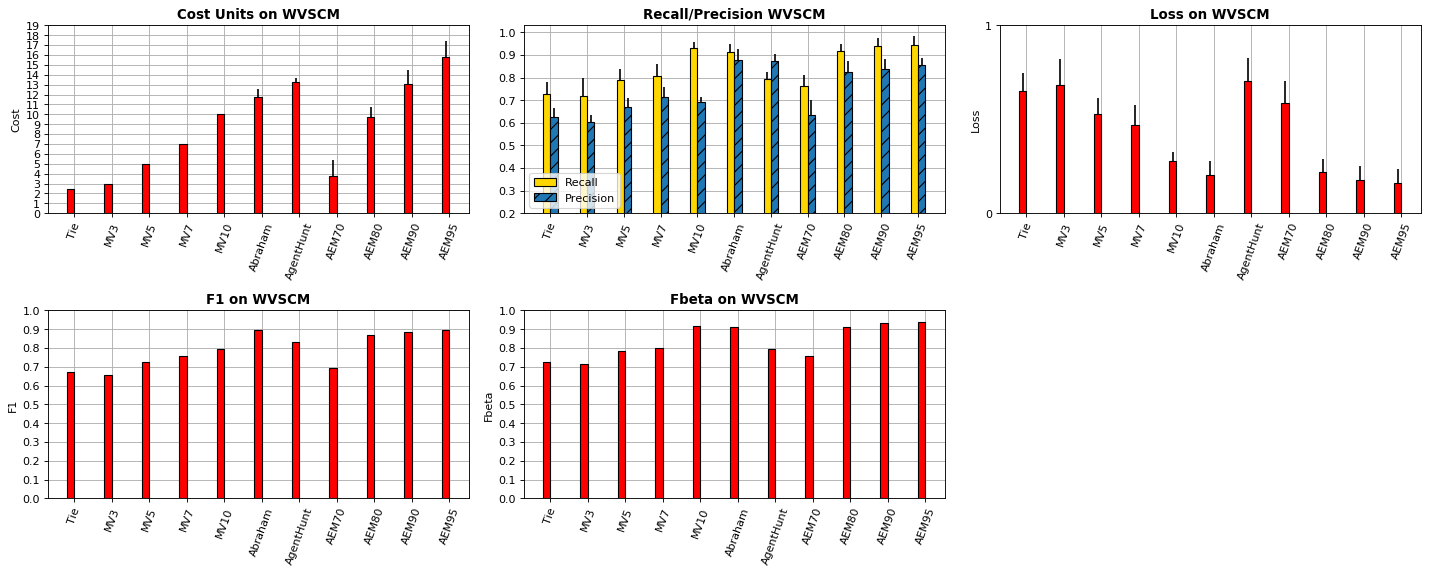



--------------------------------------------------




In [46]:
from IPython.core import display as ICD
import helpers.algorithms_utils as alg_utils

data_mv = pd.read_csv('./results/real_world/all_mv_full_metrics.csv')
data_tie = pd.read_csv('./results/real_world/all_break_tie_full_metrics.csv')
data_abraham = pd.read_csv('./results/real_world/all_abraham_full_metrics.csv')
data_agenthunt = pd.read_csv('./results/agenthunt/real_world_results_full_metrics.csv')
adaptive = pd.read_csv('./results/real_world/all_adaptive_full_metrics.csv')


data_bal = 0.5
cr = 0.05

datasets = ['BarzanMozafari', 'RTE', 'SpamCF', 'TEMP', 'WVSCM']

for dataset in datasets:
    
    ground_truth, workers_accuracy = alg_utils.get_real_dataset_data(dataset)
    items_num = len(ground_truth)

    mv = data_mv[data_mv['dataset']==dataset]
    tie = data_tie[data_tie['dataset']==dataset]
    abraham = data_abraham[data_abraham['dataset']==dataset]
    agenthunt = data_agenthunt[data_agenthunt['dataset']==dataset]
    adaptive_mv = adaptive[adaptive['decision_fn']=='decision_function_mv'][adaptive['cost_ratio']==cr][adaptive['dataset']==dataset]
    adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'][adaptive['cost_ratio']==cr][adaptive['dataset']==dataset]

    datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

    items = 11
    ind = np.arange(items)
    width = .2
    xticks_ind = ind + width / 2
    xticks_rotation = 70
    xticks_names = ('Tie', 'MV3', 'MV5', 'MV7', 'MV10', 'Abraham', 'AgentHunt', 'AEM70', 'AEM80', 'AEM90', 'AEM95')


    #Figure 1
    plt.figure(num=1, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.subplots_adjust(bottom = .1)

    #Balanced dataset
    #1)
    plt.subplot(331)
    cost_mean, cost_std = get_approaches_results(datasets_print, "cost", "cost_std", False, items_num)
    p1 = plt.bar(ind, cost_mean, width, yerr=cost_std, zorder=3, color='red', edgecolor='black')
    plt.ylabel('Cost')
    plt.title(f'Cost Units on {dataset}', fontweight="bold")
    plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
    plt.grid(zorder=0)
    plt.yticks(np.arange(0,20,1))
    #plt.savefig("./charts/balanced_data_cost", bbox_inches = 'tight', pad_inches = 0)
    #plt.show()

    #2)
    #plt.figure(num=2, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
    #plt.subplots_adjust(bottom = .05)
    plt.subplot(332)
    precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std")
    recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std")
    p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
    p2 = plt.bar(ind+width, precision_mean, width, yerr=precision_std, zorder=3, edgecolor='black', hatch="//")
    plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
    plt.title(f'Recall/Precision {dataset}', fontweight="bold")
    plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
    plt.grid(zorder=0)
    plt.yticks(np.arange(0,1.01,.1))
    plt.gca().set_ylim(bottom=0.2)
    #plt.savefig("./charts/balanced_data_quality", bbox_inches = 'tight', pad_inches = 0)
    
    #3)
    plt.subplot(333)
    loss_mean, loss_std = get_approaches_results(datasets_print, "loss", "loss_std", False, items_num)
    p1 = plt.bar(ind, loss_mean, width, yerr=loss_std, zorder=3, color='red', edgecolor='black')
    plt.ylabel('Loss')
    plt.title(f'Loss on {dataset}', fontweight="bold")
    plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
    plt.grid(zorder=0)
    plt.yticks(np.arange(0,2,1))
    #plt.savefig("./charts/balanced_data_cost", bbox_inches = 'tight', pad_inches = 0)
    #plt.show()
    
    #4)
    plt.subplot(334)
    f1_mean, f1_std = get_approaches_results(datasets_print, "f1", "f1_std", False, items_num)
    p1 = plt.bar(ind, f1_mean, width, yerr=f1_std, zorder=3, color='red', edgecolor='black')
    plt.ylabel('F1')
    plt.title(f'F1 on {dataset}', fontweight="bold")
    plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
    plt.grid(zorder=0)
    plt.yticks(np.arange(0,1.1,.1))
    #plt.savefig("./charts/balanced_data_cost", bbox_inches = 'tight', pad_inches = 0)
    #plt.show()
    
    plt.subplot(335)
    fbeta_mean, fbeta_std = get_approaches_results(datasets_print, "fbeta", "fbeta_std", False, items_num)
    p1 = plt.bar(ind, fbeta_mean, width, yerr=fbeta_std, zorder=3, color='red', edgecolor='black')
    plt.ylabel('Fbeta')
    plt.title(f'Fbeta on {dataset}', fontweight="bold")
    plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
    plt.grid(zorder=0)
    plt.yticks(np.arange(0,1.1,.1))
    #plt.savefig("./charts/balanced_data_cost", bbox_inches = 'tight', pad_inches = 0)
    
    plt.tight_layout()
    plt.show()
    
    print("\n")
    print("--------------------------------------------------")
    print("\n")
    

## Summarized Results

In [5]:
#simulated datasets
sm_data_mv = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv.csv')
sm_data_tie = pd.read_csv('./results/simulated_dataset/all_combinations_results_break_tie.csv')
sm_data_abraham = pd.read_csv('./results/abraham/results_cs_es_varied.csv')
sm_data_agenthunt = pd.read_csv('./results/agenthunt/simulated_datasets_results.csv')
sm_adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive.csv')

#real world datasets
rw_data_mv = pd.read_csv('./results/real_world/all_mv.csv')
rw_data_tie = pd.read_csv('./results/real_world/all_break_tie.csv')
rw_data_abraham = pd.read_csv('./results/real_world/all_abraham.csv')
rw_data_agenthunt = pd.read_csv('./results/agenthunt/real_world_results.csv')
rw_adaptive = pd.read_csv('./results/real_world/all_adaptive.csv')

approaches = {'Tie':{}, 'MV3':{}, 'MV5':{}, 'MV7':{}, 'MV10':{}, 'Abraham':{}, 'Dai-POMDP':{}, 
        'AMV70':{}, 'AMV80':{}, 'AMV90':{}, 'AMV95':{}, 'AEM70':{}, 'AEM80':{}, 'AEM90':{}, 'AEM95':{}}

loss_column = 'loss'
recall_column = 'recall'
precision_column = 'precision'
cost_column = 'cost'

approaches['Tie'][loss_column] = get_total_results(sm_data_tie, rw_data_tie, loss_column)
approaches['Tie'][recall_column] = get_total_results(sm_data_tie, rw_data_tie, recall_column)
approaches['Tie'][precision_column] = get_total_results(sm_data_tie, rw_data_tie, precision_column)
approaches['Tie'][cost_column] = get_total_results(sm_data_tie, rw_data_tie, cost_column)

approaches['MV3'][loss_column] = get_total_results(sm_data_mv, rw_data_mv, loss_column, 3)
approaches['MV3'][recall_column] = get_total_results(sm_data_mv, rw_data_mv, recall_column, 3)
approaches['MV3'][precision_column] = get_total_results(sm_data_mv, rw_data_mv, precision_column, 3)
approaches['MV3'][cost_column] = get_total_results(sm_data_mv, rw_data_mv, cost_column, 3)

approaches['MV5'][loss_column] = get_total_results(sm_data_mv, rw_data_mv, loss_column, 5)
approaches['MV5'][recall_column] = get_total_results(sm_data_mv, rw_data_mv, recall_column, 5)
approaches['MV5'][precision_column] = get_total_results(sm_data_mv, rw_data_mv, precision_column, 5)
approaches['MV5'][cost_column] = get_total_results(sm_data_mv, rw_data_mv, cost_column, 5)

approaches['MV7'][loss_column] = get_total_results(sm_data_mv, rw_data_mv, loss_column, 7)
approaches['MV7'][recall_column] = get_total_results(sm_data_mv, rw_data_mv, recall_column, 7)
approaches['MV7'][precision_column] = get_total_results(sm_data_mv, rw_data_mv, precision_column, 7)
approaches['MV7'][cost_column] = get_total_results(sm_data_mv, rw_data_mv, cost_column, 7)

approaches['MV10'][loss_column] = get_total_results(sm_data_mv, rw_data_mv, loss_column, 10)
approaches['MV10'][recall_column] = get_total_results(sm_data_mv, rw_data_mv, recall_column, 10)
approaches['MV10'][precision_column] = get_total_results(sm_data_mv, rw_data_mv, precision_column, 10)
approaches['MV10'][cost_column] = get_total_results(sm_data_mv, rw_data_mv, cost_column, 10)

abraham_c = 2
abraham_e = 0.2
approaches['Abraham'][loss_column] = get_total_results(sm_data_abraham, rw_data_abraham, loss_column, None, None, None, None, None, abraham_c, abraham_e)
approaches['Abraham'][recall_column] = get_total_results(sm_data_abraham, rw_data_abraham, recall_column, None, None, None, None, None, abraham_c, abraham_e)
approaches['Abraham'][precision_column] = get_total_results(sm_data_abraham, rw_data_abraham, precision_column, None, None, None, None, None, abraham_c, abraham_e)
approaches['Abraham'][cost_column] = get_total_results(sm_data_abraham, rw_data_abraham, cost_column, None, None, None, None, None, abraham_c, abraham_e)

approaches['Dai-POMDP'][loss_column] = get_total_results(sm_data_agenthunt, rw_data_agenthunt, loss_column)
approaches['Dai-POMDP'][recall_column] = get_total_results(sm_data_agenthunt, rw_data_agenthunt, recall_column)
approaches['Dai-POMDP'][precision_column] = get_total_results(sm_data_agenthunt, rw_data_agenthunt, precision_column)
approaches['Dai-POMDP'][cost_column] = get_total_results(sm_data_agenthunt, rw_data_agenthunt, cost_column)

cost_ratio = 0.05
decision_function_mv = 'decision_function_mv'
threshold = 0.7
approaches['AMV70'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV70'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV70'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV70'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)

threshold = 0.8
approaches['AMV80'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV80'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV80'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV80'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)

threshold = 0.9
approaches['AMV90'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV90'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV90'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV90'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)

threshold = 0.95
approaches['AMV95'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV95'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV95'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV95'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)

class_fn = 'majority_voting'
decision_function_mv = 'decision_function_bayes'
threshold = 0.7
approaches['AEM70'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM70'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM70'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM70'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)

threshold = 0.8
approaches['AEM80'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM80'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM80'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM80'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)

threshold = 0.9
approaches['AEM90'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM90'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM90'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM90'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)

threshold = 0.95
approaches['AEM95'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM95'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM95'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM95'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)

recalls_mean = [np.mean(approach[recall_column]) for key, approach in approaches.items()]
precision_mean = [np.mean(approach[precision_column]) for key, approach in approaches.items()]
quality_mean = []
for key in range(len(recall_mean)):
    quality_mean.append((recalls_mean[key] + precision_mean[key]) / 2)

data = pd.DataFrame({
    'Approach': list(approaches.keys()),
    'Cost': [float(str(np.mean(approach[cost_column]))[:5]) for key, approach in approaches.items()],
    'Loss': [float(str(np.mean(approach[loss_column]))[:5]) for key, approach in approaches.items()],
    'Recall': [float(str(val)[:5]) for val in recalls_mean],
    'Precision': [float(str(val)[:5]) for val in precision_mean],
    'Quality Mean': [float(str(val)[:5]) for val in quality_mean]
}).sort_values(['Recall', 'Precision', 'Cost', 'Loss'], ascending=False).style.highlight_max(color='yellow',axis=0).highlight_min(color='lightblue',axis=0).hide_index()

data

Approach,Cost,Loss,Recall,Precision,Quality Mean
AEM90,270.1,0.072,0.974,0.922,0.948
AEM95,311.1,0.072,0.972,0.927,0.95
Abraham,264.9,0.065,0.971,0.91,0.94
MV10,345.1,0.12,0.971,0.82,0.895
AEM80,210.9,0.14,0.947,0.891,0.919
Dai-POMDP,270.6,0.236,0.933,0.96,0.946
AMV80,279.7,0.241,0.914,0.748,0.831
MV7,241.6,0.216,0.911,0.833,0.872
AMV90,228.2,0.307,0.903,0.662,0.782
AMV70,216.2,0.243,0.901,0.787,0.844


In [150]:
data_mv = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv_full_metrics.csv')
data_tie = pd.read_csv('./results/simulated_dataset/all_combinations_results_break_tie_full_metrics.csv')
data_abraham = pd.read_csv('./results/abraham/results_cs_es_varied_full_metrics.csv')
data_agenthunt = pd.read_csv('./results/agenthunt/simulated_datasets_results_full_metrics.csv')
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive_full_metrics.csv')

data_bal = 0.5
mv = data_mv[data_mv['data_bal']==data_bal][data_mv['votes']==10]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05][adaptive['threshold']==0.8]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05][adaptive['threshold']==0.8]

#data[column_mean]/data['cost_ratio'][0]/items_num
elems = [mv, tie, abraham, agenthunt, adaptive_mv, adaptive_bayes]

legends = ('MV', 'BreakTie', 'DiffRatio', 'AI-Agent', 'AMV', 'AEM')

x_values = []
y_values = []
for elem in elems:
    x_values.append(elem['cost'].iloc[0]/0.05/1000)
    y_values.append(elem['fbeta'].iloc[0])
    

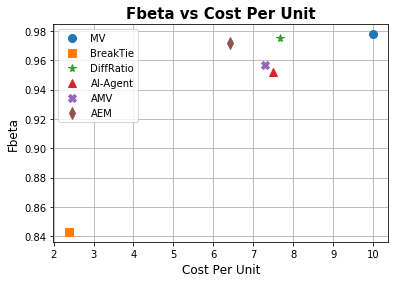

[10.0, 2.3769999999999993, 7.6574800000000005, 7.493999999999999, 7.2989999999999995, 6.412999999999999]
[0.9777639493880936, 0.8429229010426194, 0.975320317759526, 0.952115036049462, 0.9566314937830012, 0.9718842719371352]


In [220]:
from itertools import cycle
import matplotlib.pyplot as plt

lines = ["-", "--", "-.", ":"]
markers = ['o', 's', '*', '^', 'X', 'd']

linecycler = cycle(lines)
markercycler = cycle(markers)

columns_to_print = ['fbeta']
url_to_save_plt = "./charts/comparisson_fbeta_vs_cost_all"

titles = ['Fbeta vs Cost']



for key, x_elem in enumerate(x_values):
    plt.plot(x_elem, y_values[key], 
             linestyle='None',
             marker=next(markercycler), 
             markersize=8)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(legends)
plt.xlabel('Cost Per Unit', fontsize=12)
plt.ylabel('Fbeta', fontsize=12)
plt.title('Fbeta vs Cost Per Unit', fontsize=15, fontweight="bold")
    
plt.grid()

plt.savefig('./charts/fbeta_cost_all_comparisson.jpg', bbox_inches = 'tight', pad_inches = 0)
plt.show()

print(x_values)
print(y_values)
